# Aufgabe 12{-}

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

In [2]:
P0 = pd.read_hdf('zwei_populationen.h5', key='P_0_1000')
P1 = pd.read_hdf('zwei_populationen.h5', key='P_1')

In [3]:
P0_x = P0['x']
P0_y = P0['y']
P1_x = P1['x']
P1_y = P1['y']

## Teil a){-}

In [4]:
mu_P0_x = np.mean(P0_x)
mu_P0_y = np.mean(P0_y)
mu_P1_x = np.mean(P1_x)
mu_P1_y = np.mean(P1_y)
print("mu_P0")
print(mu_P0_x, mu_P0_y)
print("mu_P1")
print(mu_P1_x, mu_P1_y)

mu_P0
-0.09576791285523094 2.878846798570514
mu_P1
5.986448205069931 3.085282896934817


## Teil b){-}

In [5]:
V_P0 = np.cov(P0_x - mu_P0_x, P0_y - mu_P0_y)
V_P1 = np.cov(P1_x - mu_P1_x, P1_y - mu_P1_y)
V_P0_P1 = V_P0 + V_P1
mat_mu = np.mat(((mu_P0_x - mu_P1_x), (mu_P0_y - mu_P1_y))).T
V_B = mat_mu*mat_mu.T
print('V_P0', V_P0)
print('V_P1', V_P1)
print('V_P0_P1', V_P0_P1)
print('V_B', V_B)

V_P0 [[ 12.23612255   8.16049883]
 [  8.16049883   6.75819008]]
V_P1 [[ 12.35218537   7.41075614]
 [  7.41075614   5.47731503]]
V_P0_P1 [[ 24.58830792  15.57125497]
 [ 15.57125497  12.2355051 ]]
V_B [[ 36.99335291   1.25558896]
 [  1.25558896   0.04261586]]


## Teil c{-}

In [6]:
lambda1 = inv(V_P0_P1)*mat_mu
print(lambda1)
# ay= bx <=> y = b/a x
a = np.round(-float(lambda1[0]/lambda1[1]))
print('Geradengleichung: y =', np.round(float(-lambda1[0]/lambda1[1]), 4), 'x')

#S_W_S_B = inv(V_P0_P1)*V_B
#print(S_W_S_B)
#Det = (S_W_S_B[0,0] 
#print(Det)

[[-1.21953973]
 [ 1.53514938]]
Geradengleichung: y = 0.7944 x


In [7]:
#mat_mu = np.mat(((-5.4), (-4))).T
#V_B = mat_mu*mat_mu.T
#V_P0_P1 = np.mat(((13.2, -2.2), (-2.2, 26.4)))
#lambda1 = inv(V_P0_P1)*mat_mu
#print(lambda1)
#a =[1,2,3]
#b= [5,0,4]
#print(min(min(a),min(b)))

In [8]:
def lin(x,a):
    return x*a 

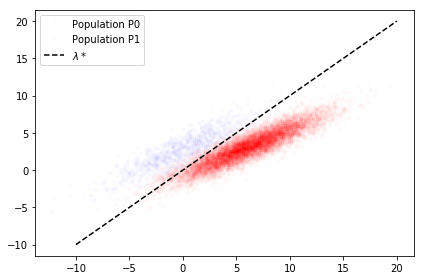

In [9]:
x = np.linspace(-10,20)
plt.plot(P0_x,P0_y,'b.',alpha=0.01,label='Population P0')
plt.plot(P1_x,P1_y,'r.',alpha=0.01,label='Population P1')
plt.plot(x, lin(x,a), 'k--',label=r'$\lambda *$')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Teil d){-}

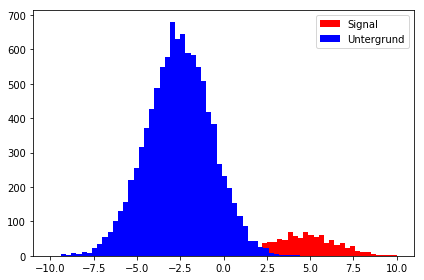

In [10]:
datahist_P0 = lambda1.T * np.mat(((P0_x),(P0_y)))
datahist_P1 = lambda1.T * np.mat(((P1_x),(P1_y)))
#print(datahist_P0)
plt.hist(datahist_P0.T,bins=50,range=(-5,10),color='r',label='Signal')
plt.hist(datahist_P1.T,bins=50,range=(-10,5),color='b',label='Untergrund')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Teil e){-}

In [11]:
def reinheit(x_value):
    return datahist_P0[x>x_value] / (datahist_P0[x>x_value] + datahist_P1[x>x_value])

In [12]:
reinh =[]
value = []
tp = 0
fp = 0
i = 0
for x_value in range(-10,10):
    while i < 1000:
        if x_value < datahist_P0.T[i]:
            tp += 1
        if x_value < datahist_P1.T[i]:
            fp += 1
        i += 1
    rein = tp / (tp + fp)
    reinh.append(rein)
    value.append(x_value)
print(reinh)
print(value)

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


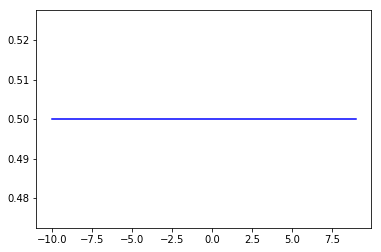

In [13]:
#x_value = np.linspace(4, 6)
#x_value = np.linspace(min(min(datahist_P0),min(datahist_P1)),max(max(datahist_P0),max(datahist_P1)))
plt.plot(value, reinh,'b-',label='Reinheit')
#plt.legend(loc='best')
#plt.tight_layout()
plt.show()

Trotz der 10 fach kleineren Zahl an "Signal"-Werten sind die Ergebnisse wie die Mittelwerte, 
Kovarianzmatrizen der beiden Verteilungen (P_0_10000 und P_0_1000) nahe zu gleich.
